# <font color=red>Лекция 6.1</font> <font color=blue>Библиотека NumPy. Массивы библиотеки NumPy</font>

**NumPy** — это библиотека языка Python, добавляющая поддержку больших многомерных массивов и матриц, вместе с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами.

 Главный объект NumPy - это однородный многомерный массив. Чаще всего это одномерная последовательность или двумерная таблица, заполненные элементами одного типа, как правило числами, которые проиндексированы кортежем положительных целых чисел. В NumPy, элементы этого кортежа называются осями, а число осей рангом.

### Установка NumPy

Для ОС Windows на [сайте](https://sourceforge.net/projects/numpy/files/NumPy/) есть exe-установщики. 

Или, если возникают проблемы, рекомендуется установить пакет Anaconda 3 (дистрибутив можно скачать или взять у преподавателя).

Что бы перейти к примерам, после установки выполним импорт пакета: 

In [1]:
import numpy as np

Импортирование numpy под псевдонимом np уже стало общепринятой, негласной договоренностью, можно сказать, традицией.

### Начинаем работу

Способов создания массивов NumPy довольно много, но мы начнем с самого тривиального - создание массива из заполненного вручную списка Python:

In [2]:
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
a

array([11, 22, 33, 44, 55, 66, 77, 88, 99])

 Теперь у нас есть одномерный массив (словосочетание "ранг массива" вряд ли приживется в русском языке), т.е. у него всего одна ось вдоль которой происходит индексирование его элементов.

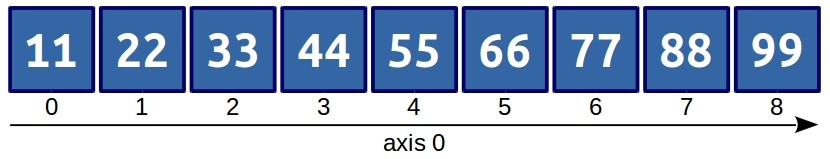

Получить доступ к числу 33 можно привычным способом: 

In [3]:
a[2]

33

Можно также переопределить тип в момент создания:

In [4]:
b = np.array([[1.5, 2, 3], [4, 5, 6]], dtype=np.complex)
b

array([[1.5+0.j, 2. +0.j, 3. +0.j],
       [4. +0.j, 5. +0.j, 6. +0.j]])

В общем-то, можно подумать, что ничего необычного в этих массивах нет , но на самом деле это не так. Запустите:

In [5]:
a[[7, 0, 3, 3, 3, 0, 7]]

array([88, 11, 44, 44, 44, 11, 88])

Вместо одного индекса, указан целый список индексов. 

Еще один пример, теперь вместо индекса укажем логическое выражение: 

In [6]:
a[a > 50]

array([55, 66, 77, 88, 99])

Цель этих примеров - продемонстрировать расширенные возможности индексирования массивов NumPy. С тем как устроена индексация мы разберемся в другой лекции. 

Еще одной интересной возможностью Numpy являются векторизованные вычисления: 

In [7]:
2*a + 10

array([ 32,  54,  76,  98, 120, 142, 164, 186, 208])

In [8]:
np.sin(a)**2 + np.cos(a)**2

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Векторизованные - означает, что все арифметические операции и математические функции выполняются сразу над всеми элементами массивов. А это в свою очередь означает, что нет никакой необходимости выполнять вычисления в цикле.

Ниже рассмотрим примеры двумерных массивов:

In [9]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
a = a.reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Сейчас мы создали массив с помощью функции np.arange(), которая во многом аналогична функции range() языка Python. Затем, мы изменили форму массива с помощью метода reshape(), т.е. на самом деле создать этот массив мы могли бы и одной командой: 

In [11]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Визуально, данный массив выглядит следующим образом: 
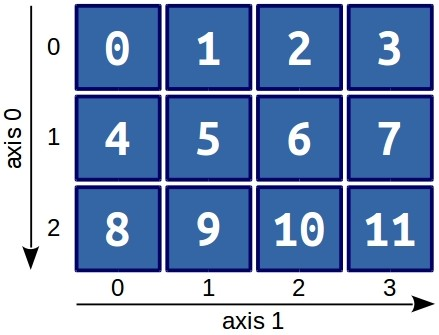

Первая ось (и индекс соответственно) - это строки, вторая ось - это столбцы. Т.е. получить элемент 9 можно простой командой:

In [12]:
a[2][1]    #  равносильно команде a[2, 1]

9

NumPy добавляет к удобному и привычному синтаксису Python, весьма удобные функции, например - транслирование массивов: 

In [13]:
c = [2, 3, 4, 5]
a*c

array([[ 0,  3,  8, 15],
       [ 8, 15, 24, 35],
       [16, 27, 40, 55]])

 В данном примере, без всяких циклов (и генераторов), мы умножили каждый столбец из массива a на соответствующий элемент из массива b. Т.е. мы транслировали массив b по массиву a.

То же самое мы можем проделать с каждой строкой массива a: 

In [14]:
d = [[10], [20], [30]]
a+d

array([[10, 11, 12, 13],
       [24, 25, 26, 27],
       [38, 39, 40, 41]])

При работе с двумерными или трехмерными массивами, особенно с массивами большей размерности, становится очень важным удобство работы с элементами массива, которые расположены вдоль отдельных измерений - его осей.

Например, у нас есть двумерный массив и мы хотим узнать его минимальные элементы по строкам и столбцам. Для начала создадим массив из случайных чисел и пусть, для нашего удобства, эти числа будут целыми: 

In [28]:
a = np.random.randint(0, 15, size = (4, 6))
a

array([[ 6, 11,  7,  2,  8,  9],
       [ 4,  2,  7, 10,  4, 11],
       [ 4,  1,  1,  6, 10, 13],
       [ 8, 10, 11, 12, 12,  5]])

Минимальный элемент в данном массиве это:

In [29]:
a.min()

1

А вот минимальные элементы по столбцам и строкам: 

In [30]:
a.min(axis = 0)    #  минимальные элементы по столбцам

array([4, 1, 1, 2, 4, 5])

In [31]:
a.min(axis = 1)    #  минимальные элементы по строкам

array([2, 2, 1, 5])

Такое поведение заложено практически во все функции и методы NumPy:

In [32]:
a.mean(axis = 0)    #  среднее по столбцам

array([5.5, 6. , 6.5, 7.5, 8.5, 9.5])

In [33]:
np.std(a, axis = 1)    #  стандартное отклонение по строкам

array([2.79384244, 3.29983165, 4.45034331, 2.49443826])

Cоздадим трехмерный массив:

In [35]:
a = np.arange(48).reshape(4, 3, 4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35]],

       [[36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]]])

Почему именно трехмерный? На самом деле реальный мир вовсе не ограничивается таблицами, векторами и матрицами. Еще существуют тензоры, кватернионы, октавы. А некоторые данные, гораздо удобнее представлять именно в трехмерном и четырехмерном представлении, например, биржевые торги по всем инструментам, лучше всего представлять в трехмерном виде, а торги нескольких бирж в четырехмерном. 

Вот наш трехмерный массив: 
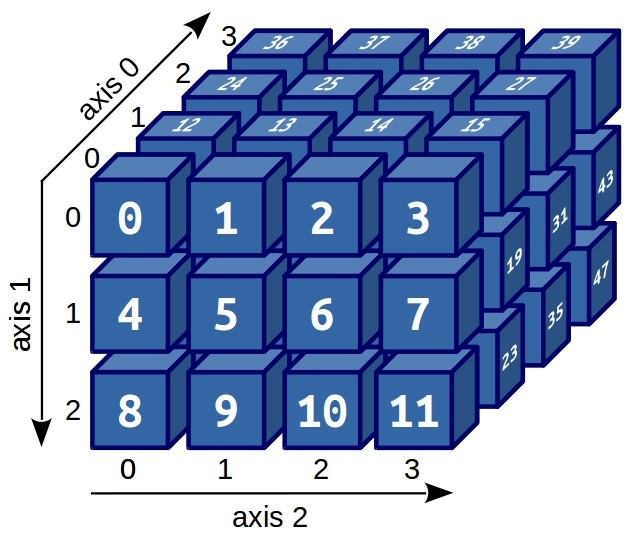
Визуализация позволяет сразу догадаться, как устроена индексация трехмерных массивов. Например, если нам нужно вытащить из данного массива число 31, то достаточно выполнить: 

In [36]:
a[2][1][3]    #  или a[2, 1, 3]

31

Но, что если мы хотим узнать побольше об этом массиве. В самом деле, у массивов есть целый ряд важных атрибутов. Например, количество осей массива (его размерность), которую при работе с очень большими массивами, не всегда легко увидеть: 

In [37]:
a.ndim

3

Массив a действительно трехмерный. Но иногда становится интересно, а на сколько же большой массив перед нами. Например, какой он формы, т.е. сколько элементов расположено вдоль каждой оси? Ответить позволяет метод ndarray.shape: 

In [38]:
a.shape

(4, 3, 4)

Метод ndarray.size просто возвращает общее количество элементов массива: 

In [39]:
a.size

48

Еще может встать такой вопрос - сколько памяти занимает наш массив? Иногда даже возникает такой вопрос - влезет ли результирующий массив после всех вычислений в оперативную память? Что бы на него ответить надо знать, сколько "весит" один элемент массива: 

In [40]:
a.itemsize    #  эквивалентно ndarray.dtype.itemsize

4

Атрибут ndarray.itemsize возвращает размер элемента в байтах. Теперь мы можем узнать какой реальный размер нашего массива: 

In [41]:
a.size*a.itemsize

192

Итого - 192 байта. На самом деле, размер занимаемой массивом памяти, зависит не только от количества элементов в нем, но и от испльзуемого типа данных.

### Наиболее важные атрибуты объектов ndarray:

**ndarray.ndim** - число измерений (чаще их называют "оси") массива.

**ndarray.shape** - размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из n строк и m столбов, shape будет (n,m). Число элементов кортежа shape равно ndim.

**ndarray.size** - количество элементов массива. Очевидно, равно произведению всех элементов атрибута shape.

**ndarray.dtype** - объект, описывающий тип элементов массива. Можно определить dtype, используя стандартные типы данных Python. NumPy здесь предоставляет целый букет возможностей, как встроенных, например: bool_, character, int8, int16, int32, int64, float8, float16, float32, float64, complex64, object_, так и возможность определить собственные типы данных, в том числе и составные.

**ndarray.itemsize** - размер каждого элемента массива в байтах.

**ndarray.data** - буфер, содержащий фактические элементы массива. Обычно не нужно использовать этот атрибут, так как обращаться к элементам массива проще всего с помощью индексов.

### Печать массивов

Если массив слишком большой, чтобы его печатать, NumPy автоматически скрывает центральную часть массива и выводит только его уголки.

In [42]:
np.arange(0, 3000, 1)

array([   0,    1,    2, ..., 2997, 2998, 2999])

Если вам действительно нужно увидеть весь массив, используйте функцию numpy.set_printoptions.
